# ТЗ к лабораторной работе №2:

**1. Найти оптимумы тестовых функций для оптимизации двумя алгоритмами библиотеки pygmo.**

В качестве тестовых функций были выбраны функция Леви №13 и функция Растригина. В качестве алгоритмов были выбраны Simple Genetic Algorithm и Self-adaptive Differential Evolution.

**2. Сконструировать нефункциональную (алгоритмическую) проблему оптимизации и решить ее алгоритмом библиотеки pygmo.**

Для решения была выбрана задача о рюкзаке: есть рюкзак определенной вместимости. Есть конечное количество вещей разного веса и ценности, которые в этот рюкзак можно положить, но поместятся не все вещи. Цель: найти такой набор вещей, который можно сложить в рюкзак, чтобы при ограниченной вместимости рюкзака была достигнута максимально возможная его ценность.

# Импорт библиотек

In [ ]:
!pip install pygmo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.5 MB 3.6 MB/s 


In [ ]:
import math
import pygmo as pg
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib import rc
from matplotlib import colors as cm

# Часть 1: функциональная задача

## Функция Растригина

In [ ]:
gen_Rastrigin = 1000 #общее количество поколений для сравнения алгоритмов
pop_Rastrigin = 100 #общее количество популяций в 1 поколении для сравнения алгоритмов

def RastriginFunction(*X, A = 10):
    return A + sum([(x**2 - A * np.cos(2 * math.pi * x)) for x in X])

### Визуализация функции Растригина

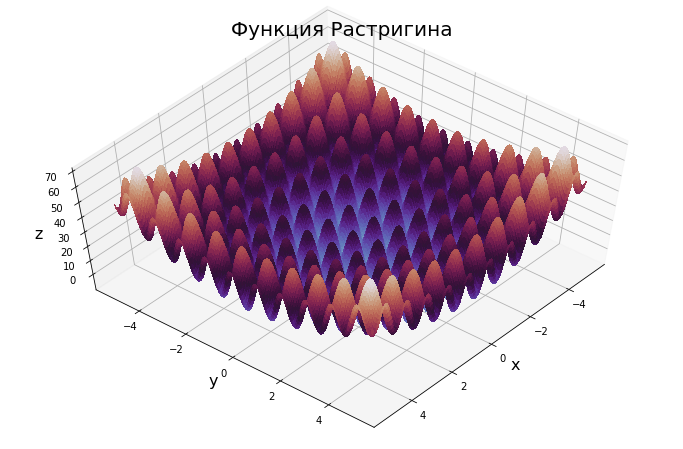

In [ ]:
xDraw = np.linspace(-5.12, 5.12, num=200)
yDraw = np.linspace(-5.12, 5.12, num=200)
X, Y = np.meshgrid(xDraw, yDraw) 
Z = RastriginFunction(X, Y)

fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='twilight', linewidth=1, antialiased=False)
ax.view_init(60, 40)
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_zlabel('z', fontsize=16)
ax.set_title('Функция Растригина', fontsize=20)
plt.show()

### Поиск глобального минимума генетическим алгоритмом pygmo

In [ ]:
class Rastrigin():
  @staticmethod
  def fitness(x):
    return [RastriginFunction(x[0], x[1])]

  @staticmethod
  def get_bounds():
    return ([-5.12, -5.12], [5.12, 5.12])

  @staticmethod
  def gradient(self, x):
        return pg.estimate_gradient_h(lambda x: self.fitness(x), x)

algo = pg.algorithm(pg.sga(gen=gen_Rastrigin))
prob = pg.problem(Rastrigin())
pop = pg.population(prob, pop_Rastrigin)
pop = algo.evolve(pop)
print("Глобальный минимум функции Растригина генетическим алгоритмом для ", gen_Rastrigin, " поколений и ", pop_Rastrigin, " популяций: ", pop.champion_f)

Глобальный минимум функции Растригина генетическим алгоритмом для  1000  поколений и  100  популяций:  [-9.99953474]


### Визуализация поиска глобального минимума генетическим алгоритмом pygmo

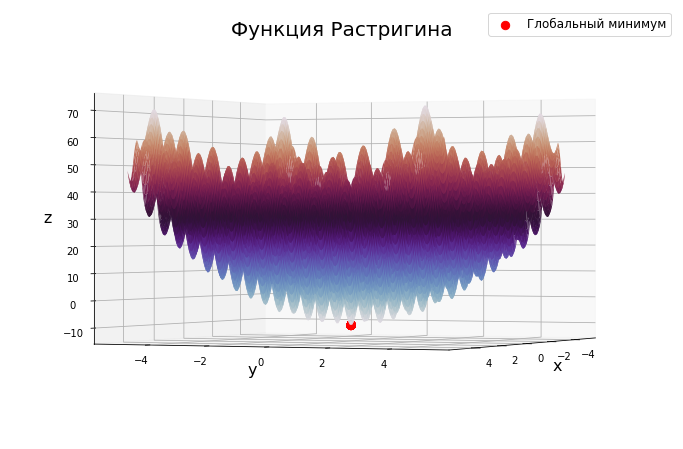

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='twilight', linewidth=1, antialiased=True)
ax.view_init(0, 25)
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_zlabel('z', fontsize=16)
ax.set_title('Функция Растригина', fontsize=20)
x = pop.get_x()[:,0]
y = pop.get_x()[:,0]
z = pop.get_f()[:,0]
ax.scatter3D(x, y, z, s=70, c='r', label ='Глобальный минимум')
ax.legend(fontsize=12)
plt.show()

### Анимация поиска глобального минимума генетическим алгоритмом pygmo




In [ ]:
algo = pg.algorithm(pg.sga(gen=1))
prob = pg.problem(Rastrigin())
pop=None

fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d', autoscale_on=False, xlim=(-5.12,5.12), ylim=(-5.12,5.12), zlim=(-10, 60))

ax.plot_wireframe(X, Y, Z, alpha=0.4)
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_zlabel('z', fontsize=16)
ax.set_title('Функция Растригина', fontsize=20, fontweight=10, loc='left')

points, = ax.plot([], [], [], linestyle='None', marker='o', markersize=10, c='red', markeredgecolor='black', label='Глобальный минимум')
ax.legend(fontsize=12)
text_template = "Поколение #%s"
text = ax.text(0, 0, 0, '', fontsize=16, transform=ax.transAxes)

def init_func():
  points.set_data_3d([], [], [])
  text.set_text(text_template % 0)
  return points, text

def animate(i):
  global pop
  if i==1:
    pop = pg.population(prob, size=200)
  else:
    pop = algo.evolve(pop)

  x = pop.get_x()[:,0]
  y = pop.get_x()[:,0]
  z = pop.get_f()[:,0]
  points.set_data_3d(x, y, z)
  text.set_text(text_template % i)
  return points, text

get_animation = animation.FuncAnimation(fig, animate, np.arange(1,15), init_func=init_func, interval=300, blit=False, repeat_delay=1000)
plt.close()
rc('animation', html='html5')
get_animation

### Поиск глобального минимума алгоритмом самоадаптивной дифференциальной эволюции pygmo

In [ ]:
algo = pg.algorithm(pg.sade(gen=gen_Rastrigin))
prob = pg.problem(Rastrigin())
pop = pg.population(prob, pop_Rastrigin)
pop = algo.evolve(pop)
print("Глобальный минимум функции Растригина алгоритмом самоадаптивной дифференциальной эволюции для ", gen_Rastrigin, " поколений и ", pop_Rastrigin, " популяций: ", pop.champion_f)

Глобальный минимум функции Растригина алгоритмом самоадаптивной дифференциальной эволюции для  1000  поколений и  100  популяций:  [-10.]


## Функция Леви №13

In [ ]:
gen_Levi13 = 1000 #общее количество поколений для сравнения алгоритмов
pop_Levi13 = 100 #общее количество популяций в 1 поколении для сравнения алгоритмов

def Levi13(x: np.array, y: np.array):
    return np.sin(3 * np.pi * x) ** 2 + ((x - 1) ** 2) * (np.sin(3 * np.pi * y) ** 2) + ((y - 1) ** 2) * (1 + np.sin(2 * np.pi * y) ** 2)

### Визуализация функции Леви №13

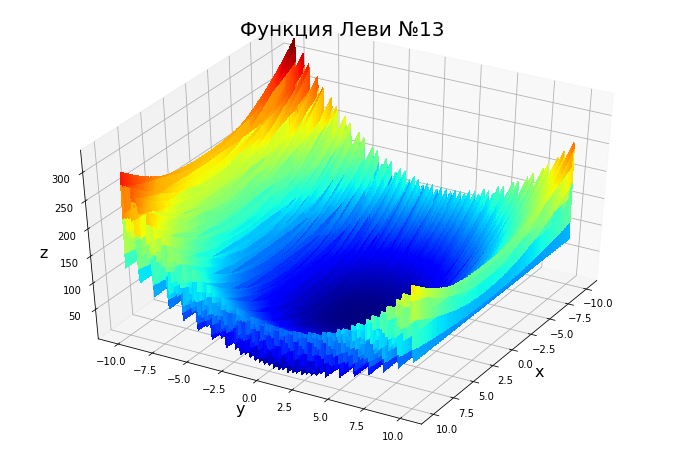

In [ ]:
xDraw = np.linspace(-10, 10, num=400)
yDraw = np.linspace(-10, 10, num=400)
X, Y = np.meshgrid(xDraw, yDraw) 
Z = Levi13(X, Y)

fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet', linewidth=1, antialiased=False)
ax.view_init(40, 30)
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_zlabel('z', fontsize=16)
ax.set_title('Функция Леви №13', fontsize=20)
plt.show()

### Поиск глобального минимума генетическим алгоритмом pygmo

In [ ]:
class Levi13():
  @staticmethod
  def fitness(x):
    return [np.sin(3 * np.pi * x[0]) ** 2 + ((x[0] - 1) ** 2) * (np.sin(3 * np.pi * x[1]) ** 2) + ((x[1] - 1) ** 2) * (1 + np.sin(2 * np.pi * x[1]) ** 2)]

  @staticmethod
  def get_bounds():
    return ([-10, -10], [10, 10])

  @staticmethod
  def gradient(self, x):
        return pg.estimate_gradient_h(lambda x: self.fitness(x), x)

algo = pg.algorithm(pg.sga(gen=gen_Levi13))
prob = pg.problem(Levi13())
pop = pg.population(prob, pop_Levi13)
pop = algo.evolve(pop)
print("Глобальный минимум функции Леви №13 генетическим алгоритмом для ", gen_Levi13, " поколений и ", pop_Levi13, " популяций: ", pop.champion_f)

Глобальный минимум функции Леви №13 генетическим алгоритмом для  1000  поколений и  100  популяций:  [0.00037372]


### Визуализация поиска глобального минимума генетическим алгоритмом pygmo

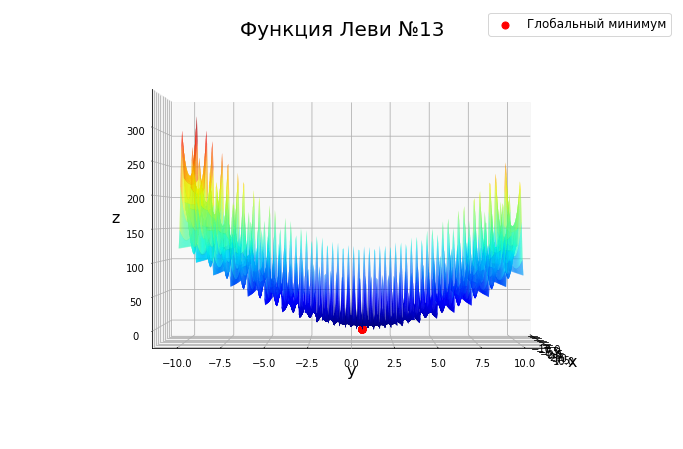

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet', linewidth=1, antialiased=True)
ax.view_init(0, 0)
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_zlabel('z', fontsize=16)
ax.set_title('Функция Леви №13', fontsize=20)
x = pop.get_x()[:,0]
y = pop.get_x()[:,0]
z = pop.get_f()[:,0]
ax.scatter3D(8, y, z, s=50, c='r', label ='Глобальный минимум')
ax.legend(fontsize=12)
plt.show()

### Анимация поиска глобального минимума генетическим алгоритмом pygmo

In [ ]:
algo = pg.algorithm(pg.sga(gen=2))
prob = pg.problem(Levi13())
pop=None

fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d', autoscale_on=False, xlim=(-10, 10), ylim=(-10, 10), zlim=(0, 300))

ax.plot_wireframe(X, Y, Z)
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_zlabel('z', fontsize=16)
ax.set_title('Функция Леви №13', fontsize=20, fontweight=10, loc='left')
ax.view_init(0, 0)

points, = ax.plot([], [], [], linestyle='None', marker='o', markersize=10, c='red', markeredgecolor='black', label='Глобальный минимум')
ax.legend(fontsize=12)
text_template = "Поколение #%s"
text = ax.text(0, 0, 0, '', fontsize=16, transform=ax.transAxes)

def init_func():
  points.set_data_3d([], [], [])
  text.set_text(text_template % 0)
  return points, text

def animate(i):
  global pop
  if i==1:
    pop = pg.population(prob, size=200)
  else:
    pop = algo.evolve(pop)

  x = 0
  y = pop.get_x()[:,0]
  z = pop.get_f()[:,0]
  points.set_data_3d(x, y, z)
  text.set_text(text_template % i)
  return points, text

get_animation = animation.FuncAnimation(fig, animate, np.arange(1,12), init_func=init_func, interval=300, blit=False, repeat_delay=1000)
plt.close()
rc('animation', html='html5')
get_animation

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


### Поиск глобального минимума алгоритмом самоадаптивной дифференциальной эволюции pygmo

In [ ]:
algo = pg.algorithm(pg.sade(gen=gen_Levi13))
prob = pg.problem(Levi13())
pop = pg.population(prob, pop_Levi13)
pop = algo.evolve(pop)
print("Глобальный минимум функции Леви №13 алгоритмом самоадаптивной дифференциальной эволюции для ", gen_Levi13, " поколений и ", pop_Levi13, " популяций: ", pop.champion_f)

Глобальный минимум функции Леви №13 алгоритмом самоадаптивной дифференциальной эволюции для  1000  поколений и  100  популяций:  [3.54400109e-11]


# Часть 2: алгоритмическая задача

In [ ]:
class Rucksack():
  def __init__(self, weight, cost, limit_weight):
    self.dim = len(cost)
    self.weight = weight
    self.cost = cost
    self.limit_weight = limit_weight

  def get_bounds(self):
    return (np.full((self.dim,), 0), np.full((self.dim,), 1))

  def fitness(self, x):
    result, limitation = np.zeros((1,)), np.zeros((1,))
    for i in range(self.dim):
      round_x = round(x[i])
      result[0] += round_x * self.cost[i]
      limitation[0] += round_x * self.weight[i]
    if (limitation[0] > self.limit_weight):
      return np.zeros((1,))
    else:
      return -result

In [ ]:
generation_count = 5
population_count = 2

cost = [17, 17, 17, 30, 30, 30, 75, 75, 75] #массив значений ценности вещей
weight = [1.5, 1.5, 1.5, 2.5, 2.5, 2.5, 6, 6, 6] #массив значений занимаемого места
limit_weight = 20 #ограничение по вместимости рюкзака
res = np.zeros(generation_count * population_count)
for i in range(1, generation_count + 1):
  for j in range(2, population_count + 2):
      algo = pg.algorithm(pg.bee_colony(gen = i))
      prob = pg.problem(Rucksack(weight, cost, limit_weight))
      pop = pg.population(prob, j)
      pop = algo.evolve(pop)
      res[(i-1) * population_count + (j-2)] = -pop.champion_f[0]
      print((("Поколение = {i}, численность популяции = {j}, результат = {res}").format(i=i, j=j, res=-pop.champion_f[0])))
  print("\n")

Поколение = 1, численность популяции = 2, результат = 156.0
Поколение = 1, численность популяции = 3, результат = 227.0


Поколение = 2, численность популяции = 2, результат = 197.0
Поколение = 2, численность популяции = 3, результат = 109.0


Поколение = 3, численность популяции = 2, результат = 244.0
Поколение = 3, численность популяции = 3, результат = 244.0


Поколение = 4, численность популяции = 2, результат = 216.0
Поколение = 4, численность популяции = 3, результат = 216.0


Поколение = 5, численность популяции = 2, результат = 231.0
Поколение = 5, численность популяции = 3, результат = 244.0




In [ ]:
import plotly.graph_objects as go
result = []
for i in range(1, generation_count + 1):
  result.append(go.Scatter3d(name=i, x=np.ones(generation_count)*i, y=np.arange(2, population_count + 2), z=res[(i-1)*2 : i*2], mode='markers', hovertemplate="Поколение=%{x}<br>Особей в популяции=%{y}<extra></extra>"))

fig = go.Figure(data=result)
fig.update_layout(legend_title_text = "Поколения:")
fig.show()